In [1]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data

mnist = input_data.read_data_sets('MNIST_data', one_hot=True)


Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [2]:
#输入层 输出层
x = tf.placeholder(tf.float32, [None, 784], name="X")
y = tf.placeholder(tf.float32, [None, 10], name="Y")

# 输入层 - 第一隐藏层
H1_NN = 256
# 这里随机数符合正太分布 truncated_normal 
W1 = tf.Variable(tf.truncated_normal([784,H1_NN]))
b1 = tf.Variable(tf.zeros([H1_NN]))
Y1 = tf.nn.relu(tf.matmul(x,W1)+b1) 

# 第一隐藏层 - 第二隐藏层
H2_NN = 64
W2 = tf.Variable(tf.truncated_normal([H1_NN, H2_NN]))
b2 = tf.Variable(tf.zeros([H2_NN]))
Y2 = tf.nn.relu(tf.matmul(Y1, W2) + b2)

# 第二隐藏层 - 输出层
W3 = tf.Variable(tf.truncated_normal([H2_NN, 10]))
b3 = tf.Variable(tf.zeros([10]))

forward= tf.matmul(Y2,W3) + b3

# 直接用softmax 加交叉熵会loss爆炸，因为有log(0)的计算
pred = tf.nn.softmax(forward)
#loss_function = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))

# v2 用softmax_cross_entropy_with_logits api 会处理交叉熵的这个问题
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=forward,labels = y))

#训练参数
train_epochs = 40
batch_size = 50
total_batch = int(mnist.train.num_examples/batch_size)
display_step = 1
learning_rate = 0.01

optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss_function)

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(pred, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))




In [3]:
from time import time
startTime = time()

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(train_epochs):
    for batch in range(total_batch):
        xs, ys = mnist.train.next_batch(batch_size)
        sess.run(optimizer, feed_dict={x:xs, y:ys})
        
        
    loss, acc = sess.run([loss_function, accuracy], feed_dict={
        x:mnist.validation.images, y:mnist.validation.labels
    })
    
    if(epoch+1)% display_step == 0:
        print("epoch = " , epoch+1,' loss = ', loss, " accuracy = ", acc)
    
duration = time() - startTime
print('Train finished takes : ' , duration)
    
        
        
        
        

epoch =  1  loss =  1.1209  accuracy =  0.6752
epoch =  2  loss =  0.651464  accuracy =  0.8344
epoch =  3  loss =  0.431758  accuracy =  0.895
epoch =  4  loss =  0.414819  accuracy =  0.8942
epoch =  5  loss =  0.34295  accuracy =  0.9232
epoch =  6  loss =  0.29101  accuracy =  0.918
epoch =  7  loss =  0.269231  accuracy =  0.947
epoch =  8  loss =  0.249211  accuracy =  0.9394
epoch =  9  loss =  0.222712  accuracy =  0.9526
epoch =  10  loss =  0.233455  accuracy =  0.9444
epoch =  11  loss =  0.268298  accuracy =  0.952
epoch =  12  loss =  0.235446  accuracy =  0.9556
epoch =  13  loss =  0.342482  accuracy =  0.9564
epoch =  14  loss =  0.203057  accuracy =  0.961
epoch =  15  loss =  0.223026  accuracy =  0.9598
epoch =  16  loss =  0.204463  accuracy =  0.9572
epoch =  17  loss =  0.2804  accuracy =  0.9598
epoch =  18  loss =  0.168222  accuracy =  0.9656
epoch =  19  loss =  0.2457  accuracy =  0.9612
epoch =  20  loss =  0.245082  accuracy =  0.9578
epoch =  21  loss =  0

In [4]:
accu_test = sess.run(accuracy, feed_dict={
    x: mnist.test.images, y:mnist.test.labels
})

print('test accuracy', accu_test)


test accuracy 0.9548


In [5]:
# one_hot to 数字（index）
prediction_result = sess.run(tf.argmax(pred, 1),feed_dict={x:mnist.test.images})
# prediction_result[0:10]

import numpy as np
compare_list = prediction_result == np.argmax(mnist.test.labels, 1)
#print(compare_list)
err_list = [i for i in range(len(compare_list)) if compare_list[i]==False]
#print(err_list)
#print(len(err_list))

In [6]:
def print_predict_err(labels, prediction):
    count = 0 
    compare_list = (prediction == np.argmax(labels, 1))
    err_list = [i for i in range(len(compare_lists)) if compare_list[i] == False]
    for x in err_lists:
        print("index = ", x, " 标签值 = ", np.argmax(labels[x]), " 预测值 = ", prediction[x] )
        count = count + 1
    print ("总计 : ",count )

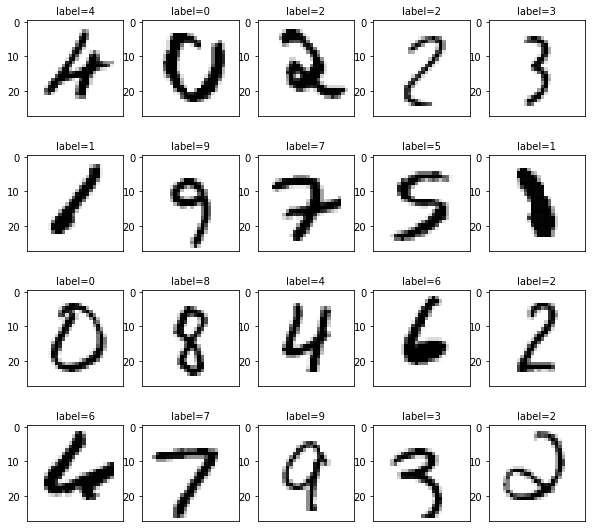

In [7]:
import matplotlib.pyplot as plt
# 可视化看结果的函数，最多显示25张图
def plot_images_labels_prediction(images,
                                  labels,
                                  prediction,
                                  index, # 从第index个开始显示
                                  num=10):
    fig = plt.gcf()# get current figure
    fig.set_size_inches(10,12) # 当前图像大小为10英寸*12英寸
    if num>25:
        num = 25
    for i in range(0,num):
        ax = plt.subplot(5,5,i+1) # 获取当前要处理的子图
        ax.imshow(np.reshape(images[index],(28,28)),cmap='binary') #指定image reshape
        title = 'label=' + str(np.argmax(labels[index]))
        
        ax.set_title(title,fontsize=10) # 在图上显示预测值
        ax.set_xticks([]) # 为了美观， 不显示x和y轴
        ax.set_xticks([])
        index = index + 1
    plt.show()

plot_images_labels_prediction(mnist.test.images, mnist.test.labels, prediction_result, 610, 20)